# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

In [2]:
pip install ydata-profiling

In [3]:
from ydata_profiling import ProfileReport

In [4]:
pip install phik

In [5]:
import phik

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Чтобы результаты были воспроизводыми и чтобы случайность не влияла на качество модели

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [6]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [7]:
for i in range(0, len(df_train)):
  try:
    ffil_value = float(df_train.loc[i, 'max_power'][:-4])
    df_train.loc[i, 'max_power'] = ffil_value

  except:
    if df_train.loc[i, 'max_power'] in [np.nan, 'nan']:
      continue
    elif df_train.loc[i, 'max_power'] == '0':
      ffil_value = float(df_train.loc[i, 'max_power'])
      df_train.loc[i, 'max_power'] = ffil_value
    else:
      df_train.loc[i, 'max_power'] = 0


In [8]:
missing_train = df_train.isnull().sum()

In [9]:
missing_train[missing_train > 0]

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

In [10]:
missing_test = df_test.isnull().sum()

In [11]:
missing_test[missing_test > 0]

mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

In [12]:
df_train.duplicated().sum()

np.int64(985)

In [13]:
df_test.duplicated().sum()

np.int64(62)

In [14]:
profile_train = ProfileReport(df_train, title="Train Report")
profile_train.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:01<00:00,  9.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

выводы:
- количество пропусков и дубликатов в разумных пределах
- как и предполагали ранее, по selling_price и km_dirven есть аномально высокие значения
- torque записан в разных форматах, нужно обработать
- mileage, engine, max_power распознаются как строки
- большинство автомобилей от частников, а не от дилеров. это отражает более реальную цену на рынке. дилеры могут манипулировать ценами и быть подвержены регуляторам
- большинство авто - в бюджетном сегменте. об этом говорит средняя цена и мощность двигателя. по идее это должно быть плюсом для обучения модели, так как мы рассматриваем конкретный ценовой сегмент


### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [15]:
df_train.describe(include=[np.number])

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [16]:
df_test.describe(include=[np.number])

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [17]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine  max_power          torque  
count        6797     6797     6803.0            6796  
unique        386      120      313.0             419  
top     18.9 kmpl  1248 CC       74.0  190Nm@ 2000rpm  
freq          197      885      330.0             468

In [18]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

по признакам selling_price и km_diren середнее сильно выше медианы. это говорит о том, что есть несколько высоких значений, которые тянут среднее вверх, стоит обратить на них внимание. это могут быть ошибки сбора данных, либо дейстивтельно такие высокие значения.

что еще можно заметить:
- очень высокая диперсия по km_driven относительно минимума и максимума
- у какого-то автомобиля 14 seats. похоже на абтобус, хотя большинство машин - обычные 4-5 местные. модель будет точнее если обучать ее на одном типе транспорта
- разный count
- по year среднее меньше медианы, больше старых авто

есть асимметрия, не помешает сделать логорифмирование значений

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [19]:
features = df_train.drop('selling_price', axis=1)
duplicates_mask = features.duplicated(keep=False)

In [20]:
df_train[duplicates_mask].sort_values(by=features.columns.tolist())

name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner     mileage   engine  \
1703  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
1836  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
117   Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
...      ...         ...          ...          ...         ...      ...   
5637  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5652  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5753  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5991  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
6778  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   

     max_power               torque  seats  
1703    174.33  380Nm@ 1750-2500rpm    5.0  
6307    174.33  380Nm@ 1750-2500rpm    5.0  
1836     241.4  580Nm@ 1400-3250rpm    5.0  
6704     241.4  580Nm@ 1400-3250rpm    5.0  
117      188.0  400nm@ 1750-3000rpm    5.0  
...        ...                  ...    ...  
5637     190.0                400Nm    5.0  
5652     190.0                400Nm    5.0  
5753     190.0                400Nm    5.0  
5991     190.0                400Nm    5.0  
6778     190.0                400Nm    5.0  

[1799 rows x 13 columns]

In [21]:
df_train = df_train.drop_duplicates(subset=features.columns, keep='first')
df_train = df_train.reset_index(drop=True)

In [22]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [23]:
def clean_numeric_columns(df):
    df['mileage'] = df['mileage'].astype(str).str.replace(r' kmpl| km/kg', '', regex=True).replace('nan', np.nan).astype(float)
    df['engine'] = df['engine'].astype(str).str.replace(' CC', '').replace('nan', np.nan).astype(float)
    df['max_power'] = df['max_power'].astype(str).str.replace(' bhp', '').replace('nan', np.nan).astype(float)
    return df

In [24]:
df_train = clean_numeric_columns(df_train)
df_test = clean_numeric_columns(df_test)

In [25]:
# from claude.ai

def parse_torque(df):
    df['torque_value'] = np.nan
    df['max_torque_rpm'] = np.nan

    for idx, row in df.iterrows():
        torque_str = str(row['torque'])

        if torque_str == 'nan' or pd.isna(torque_str):
            continue

        torque_val = np.nan
        rpm_val = np.nan

        torque_match = re.search(r'([\d.]+)\s*(?:Nm|nm|NM|kgm)', torque_str, re.IGNORECASE)
        if torque_match:
            torque_val = float(torque_match.group(1))

            if 'kgm' in torque_str.lower():
                torque_val = torque_val * 9.80665

        rpm_match = re.search(r'@?\s*([\d,]+)(?:-[\d,]+)?\s*(?:rpm|\(rpm)', torque_str, re.IGNORECASE)
        if rpm_match:
            rpm_str = rpm_match.group(1).replace(',', '')
            rpm_val = float(rpm_str)

        df.at[idx, 'torque_value'] = torque_val
        df.at[idx, 'max_torque_rpm'] = rpm_val

    df = df.drop('torque', axis=1)

    return df

In [26]:
df_train = parse_torque(df_train)

In [27]:
df_test = parse_torque(df_test)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [28]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
medians = df_train[numeric_cols].median()
df_train[numeric_cols] = df_train[numeric_cols].fillna(medians)
df_test[numeric_cols] = df_test[numeric_cols].fillna(medians)

In [29]:
df_train.isnull().sum().sum()

np.int64(0)

In [30]:
df_test.isnull().sum().sum()

np.int64(0)

медиану правильно брать из train и применять к train и test. test - это данные которые модель не должна видеть, следовательно мы не можем делать что-либо данные из test, кроме как оценивать модель на них после обучения

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [31]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

seats имеет смысл рассматривать как категориальные признак, потому что количество мест определяет тип кузова. например 2-х местные авто - купе, скорее всего спортивные машины. 7-и местные - большие внедорожники. но это не означает что 7-ми местный внедорожник должен стоить в 3.5 раза дороже 2-х местной спортивной машины, то есть нет линейной зависимости

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [32]:
df_train.describe(include=[np.number])

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  torque_value  max_torque_rpm  
count  5840.000000  5840.000000   5840.000000     5840.000000  
mean     87.892354     5.426712    171.782368     2624.849829  
std      31.661223     0.982344     94.799972     1078.129574  
min       0.000000     2.000000     47.071920      175.000000  
25%      68.000000     5.000000    112.000000     1750.000000  
50%      81.860000     5.000000    160.000000     2000.000000  
75%      99.000000     5.000000    200.000000     3500.000000  
max     400.000000    14.000000   3726.527000     5000.000000

In [33]:
df_test.describe(include=[np.number])

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  torque_value  max_torque_rpm  
count  1000.000000  1000.000000   1000.000000     1000.000000  
mean     90.841670     5.403000    174.858914     2666.056000  
std      34.893389     0.912921     87.916553     1100.112498  
min      34.200000     4.000000     48.000000      500.000000  
25%      69.000000     5.000000    111.795810     1750.000000  
50%      82.425000     5.000000    160.000000     2000.000000  
75%     102.000000     5.000000    205.000000     3850.000000  
max     280.000000     9.000000    620.000000     5000.000000

In [34]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [35]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

сдвига нет и не должны быть, так как мы использовали медиану (а не среднее)

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [36]:
def plot_pairplot(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    plt.figure(figsize=(10, 10))
    sns.pairplot(df[numeric_cols], diag_kind='hist', plot_kws={'alpha': 0.6})
    plt.tight_layout()
    plt.show()

<Figure size 1000x1000 with 0 Axes>

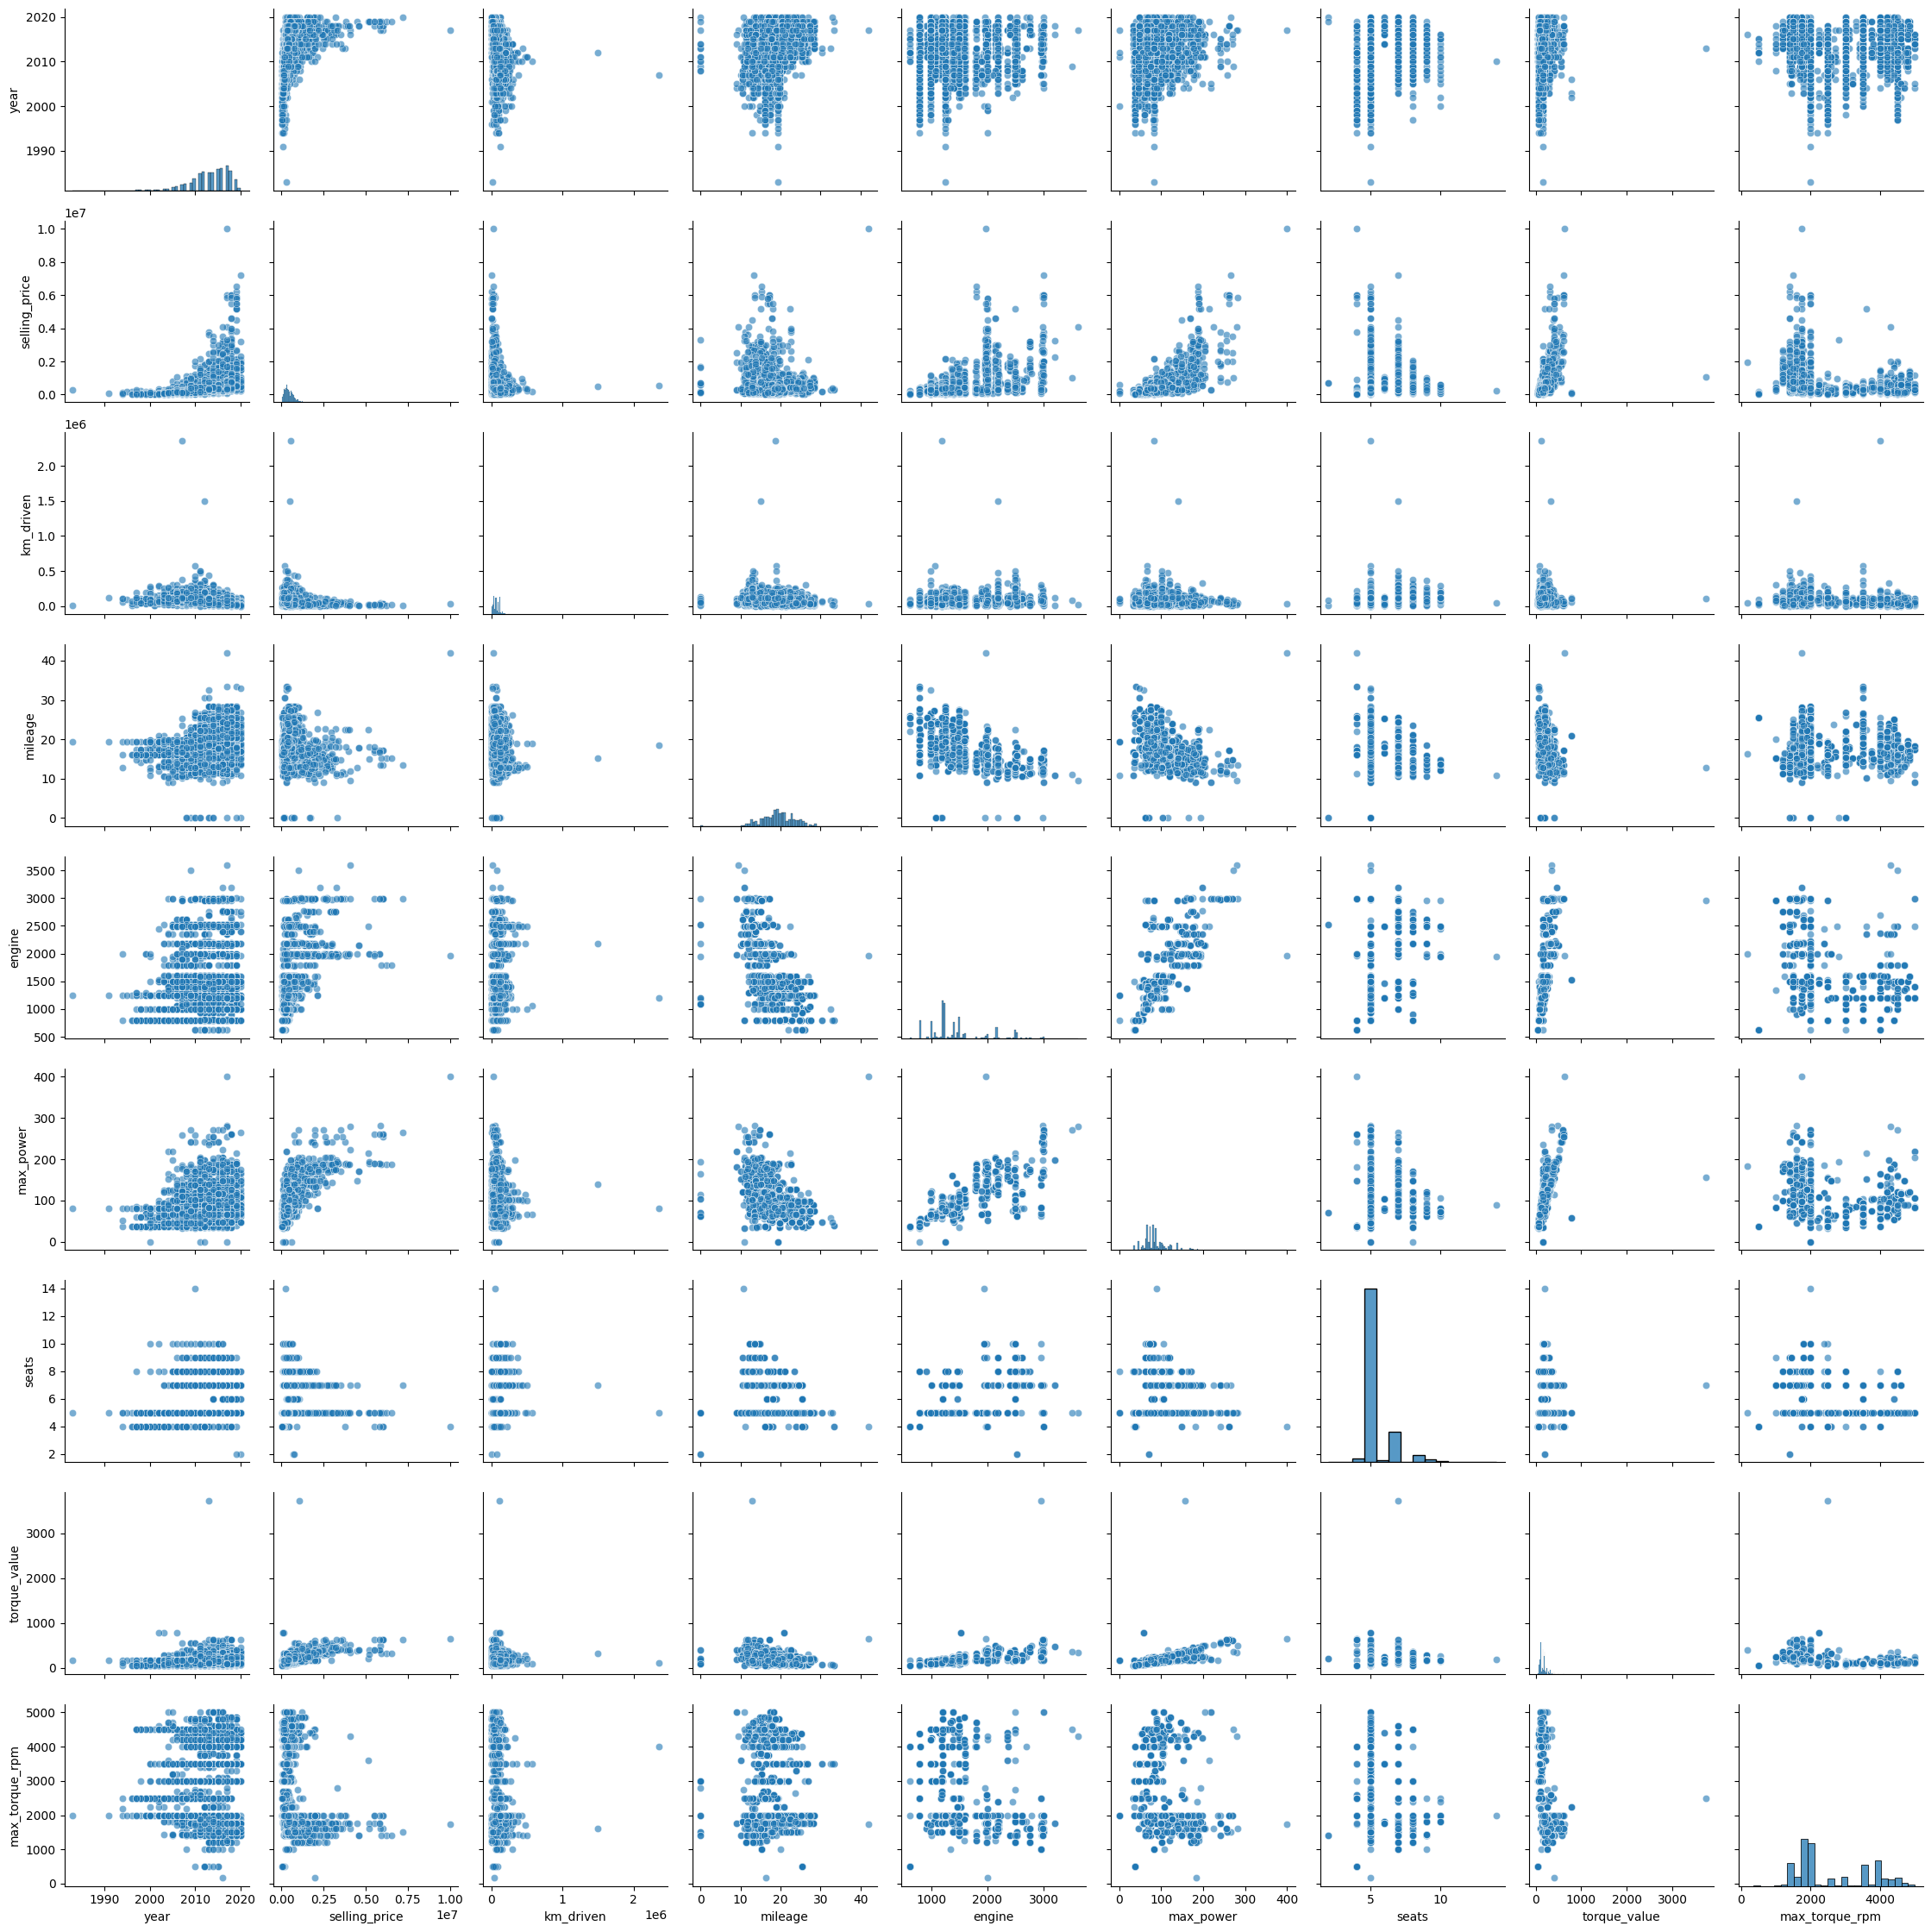

In [37]:
plot_pairplot(df_train)

<Figure size 1000x1000 with 0 Axes>

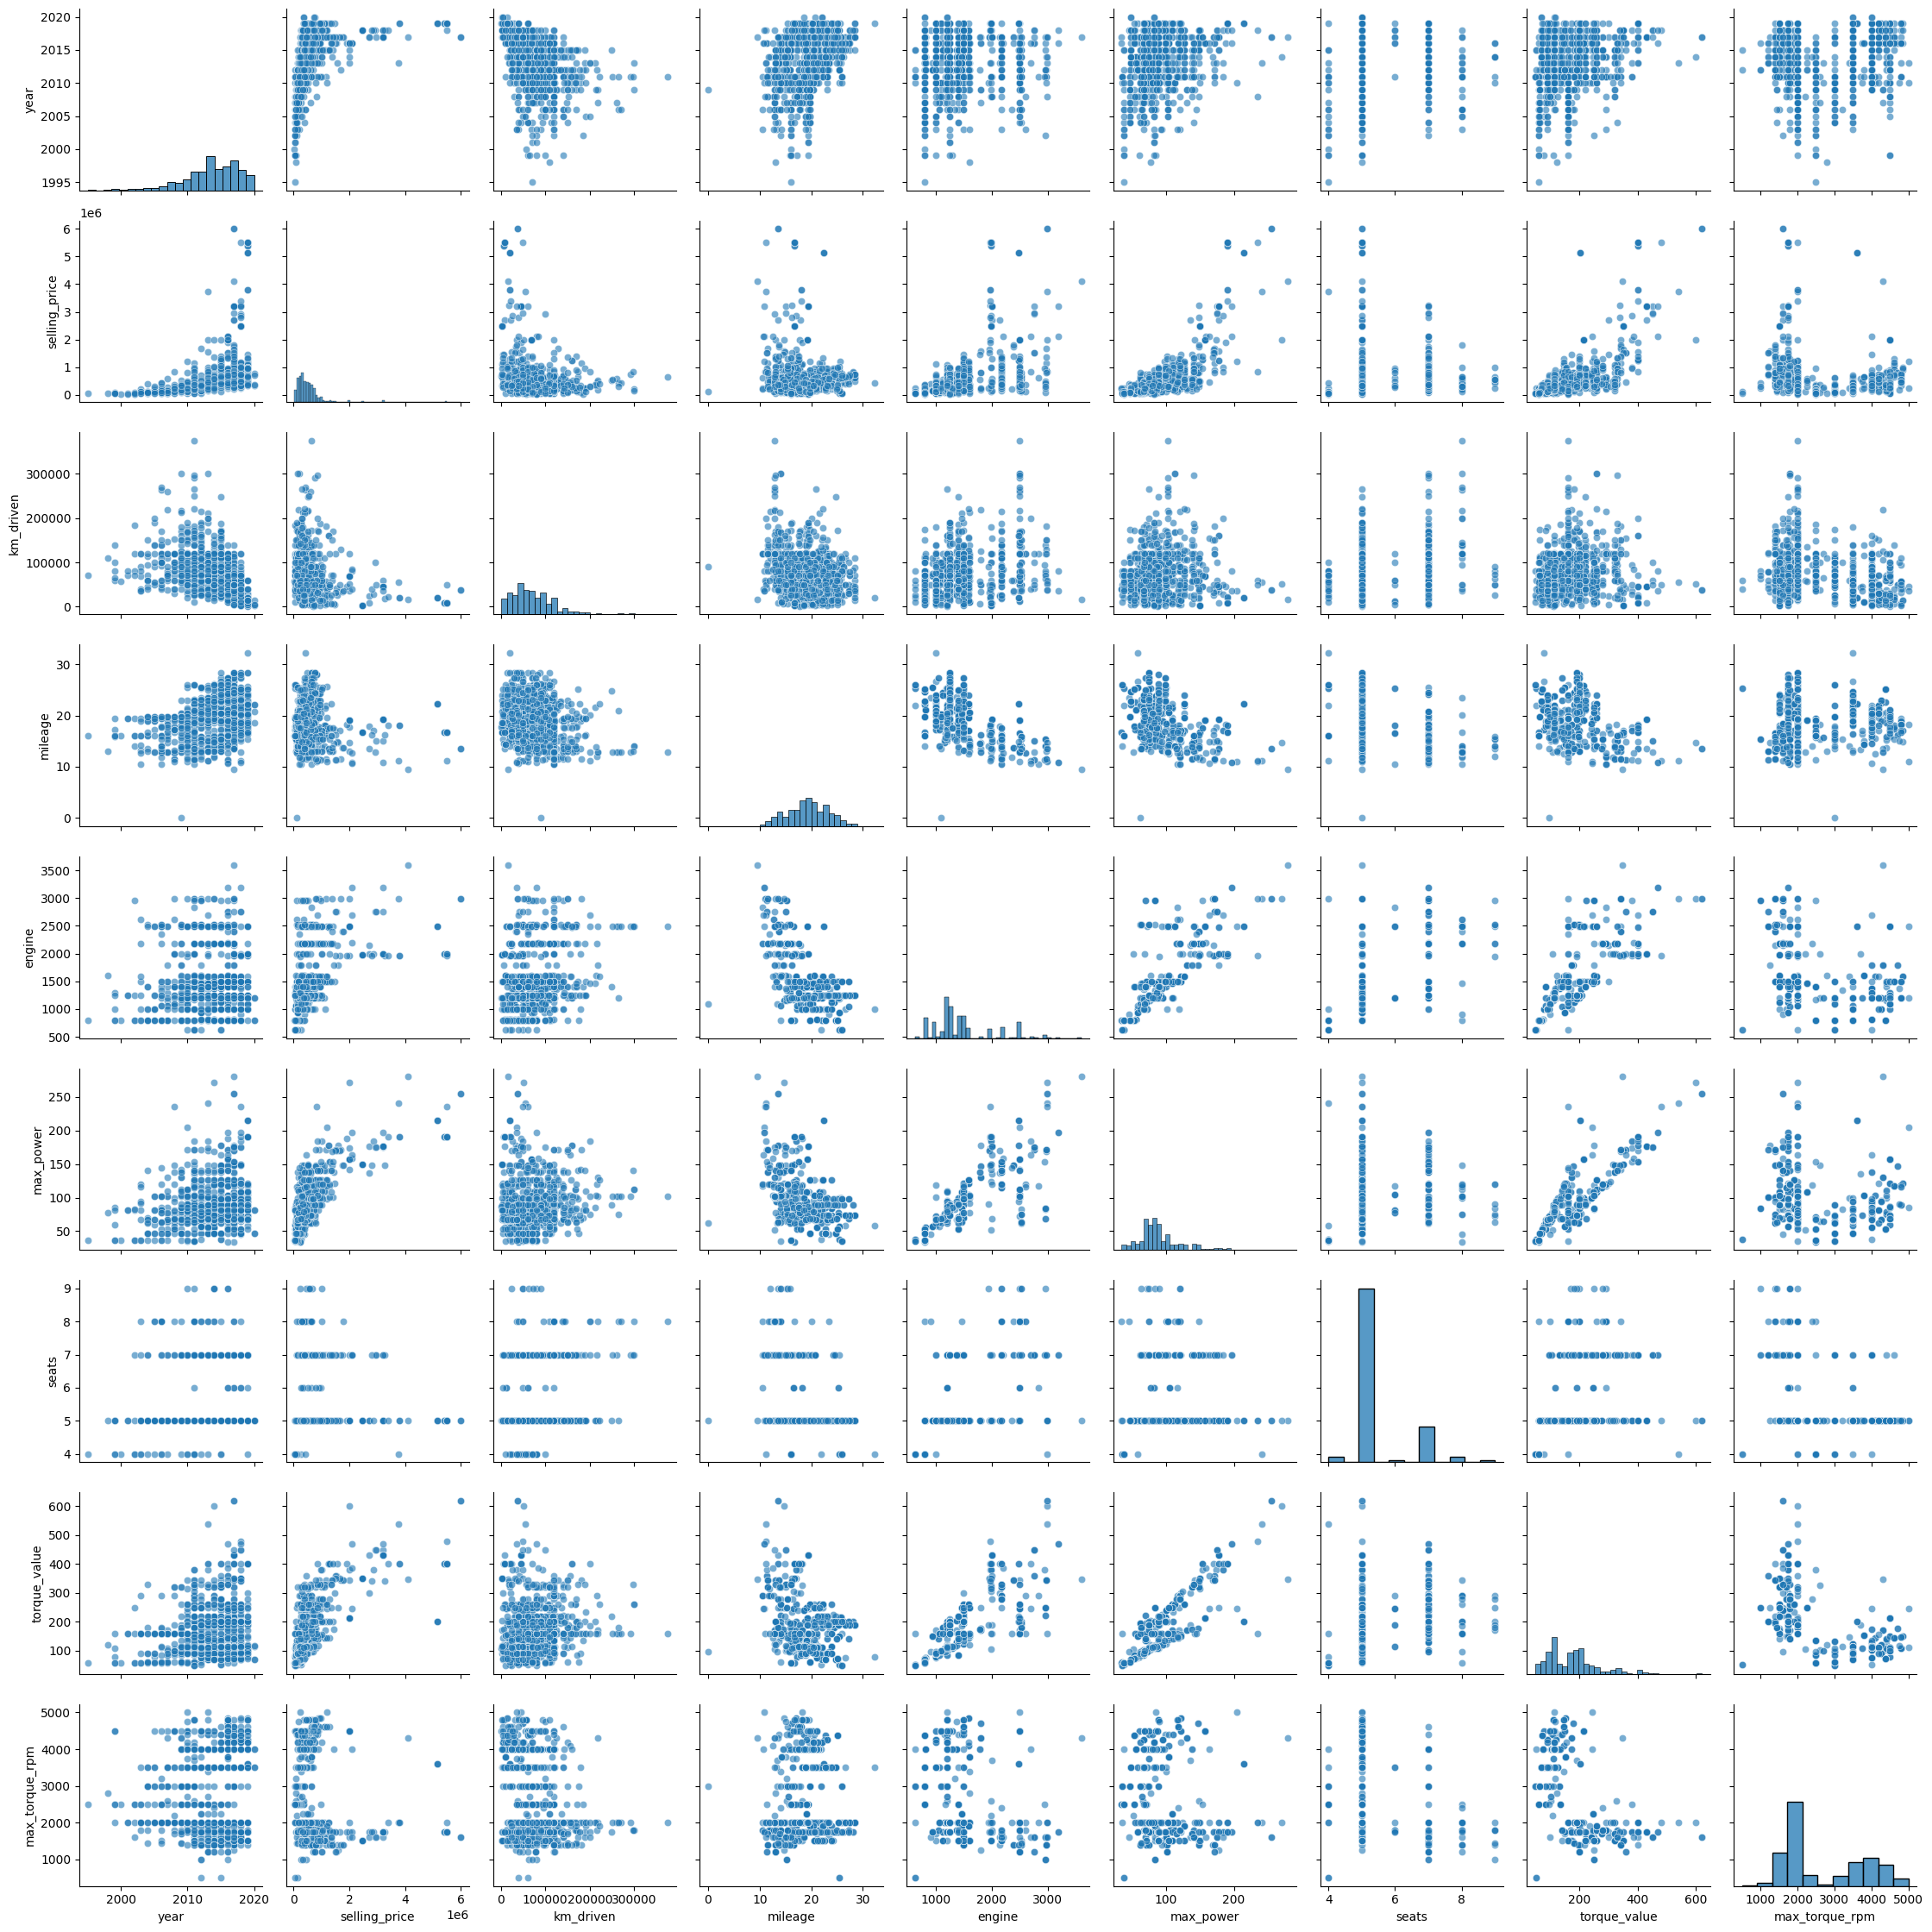

In [38]:
plot_pairplot(df_test)

на первый взгляд точно есть зависимость целевой переменной от:
- torque_value
- max_power
- engine
- year

графики для трейна и теста похожи

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

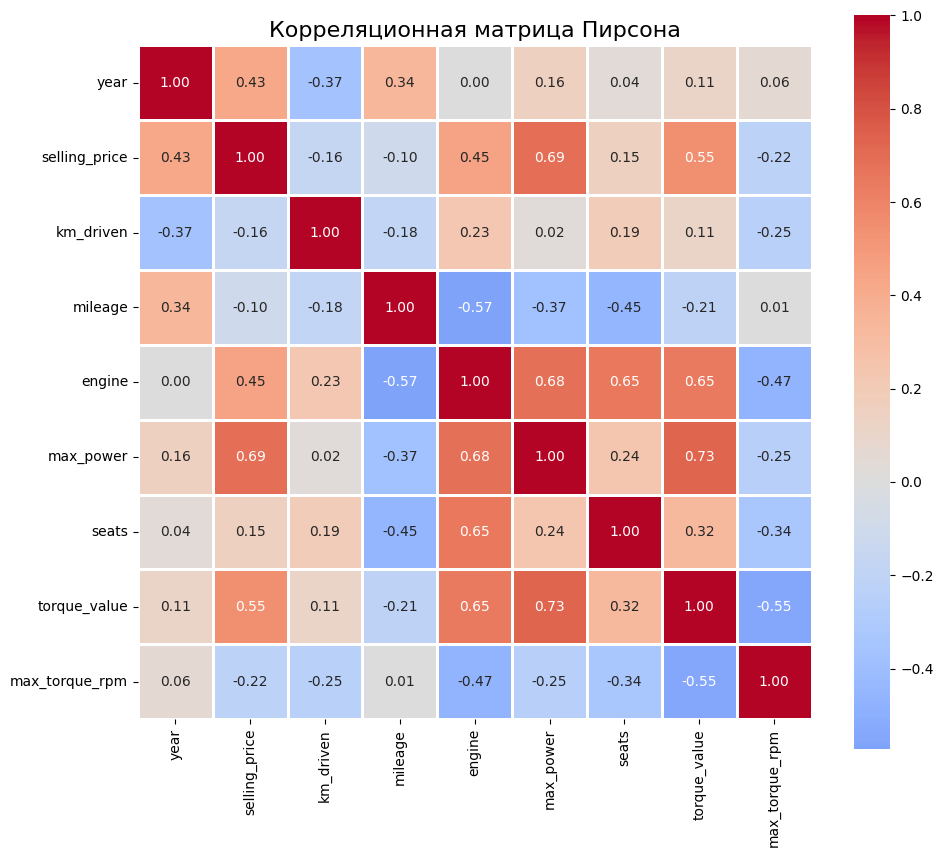

In [39]:
correlation_matrix = df_train[numeric_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Корреляционная матрица Пирсона', fontsize=16)
plt.tight_layout()
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

наименее скоррелированы - max_torque_rpm / mileage - 0.01
наиболее скоррелированы - max_power / torque_value - 0.73

да, чем меньше год, тем больше килрметров - отрицательная корреляция исходя из графика выше

по умолчанию используется person, как и написано в задании :)

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [40]:
def spearman_correlation(x, y):
    r_x = np.argsort(np.argsort(x)) + 1
    r_y = np.argsort(np.argsort(y)) + 1
    d = r_x - r_y
    n = len(x)
    return 1 - (6 * np.sum(d ** 2)) / (n * (n**2 - 1))

In [41]:
def spearman_correlation_matrix(df):
    cols = df.columns
    corr_matrix = np.zeros((len(cols), len(cols)))

    for i in range(len(cols)):
        for j in range(len(cols)):
            if i == j:
                corr_matrix[i, j] = 1.0
            else:
                corr_matrix[i, j] = spearman_correlation(
                    df.iloc[:, i].values,
                    df.iloc[:, j].values
                )

    return pd.DataFrame(corr_matrix, index=cols, columns=cols)

<Axes: >

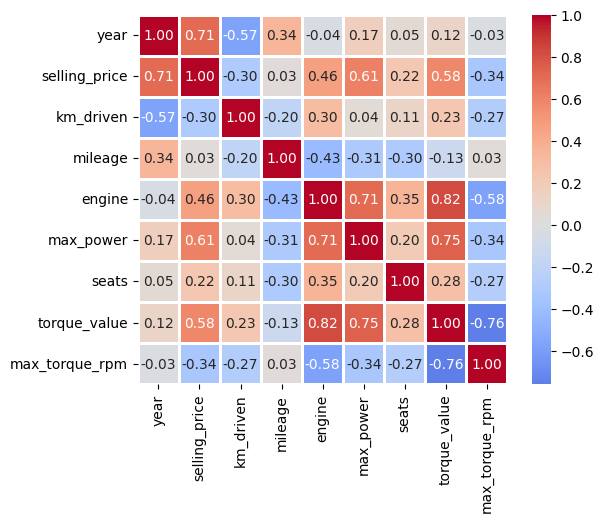

In [42]:
df_numeric = df_train[numeric_cols]
spearman_my = spearman_correlation_matrix(df_numeric)
sns.heatmap(spearman_my, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)

<Axes: >

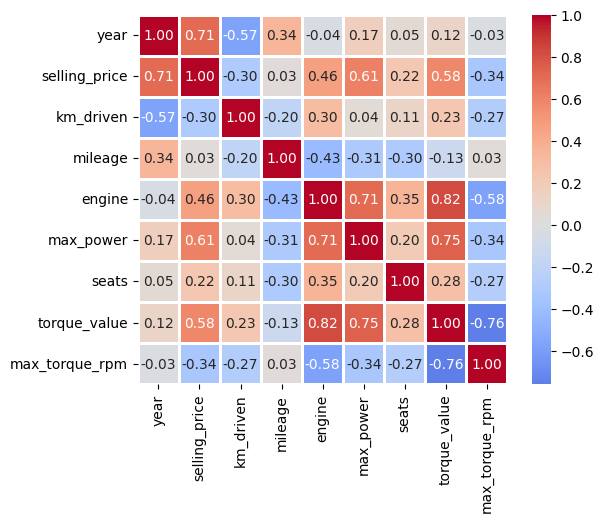

In [43]:
spearman_lib = df_numeric.corr(method='spearman')
sns.heatmap(spearman_my, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)

матрицы получились идентичные, реализация верная

вывод: значения получились в среднем больше по модулю. это ожидаемо, так как корреляция Спирамана отражает не линейную зависимость, а поранговую. можно считать что линейная зависимость - это частный случай ранговой, так что ожидаемо, что числа тут больше

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_value', 'max_torque_rpm']


/usr/local/lib/python3.12/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


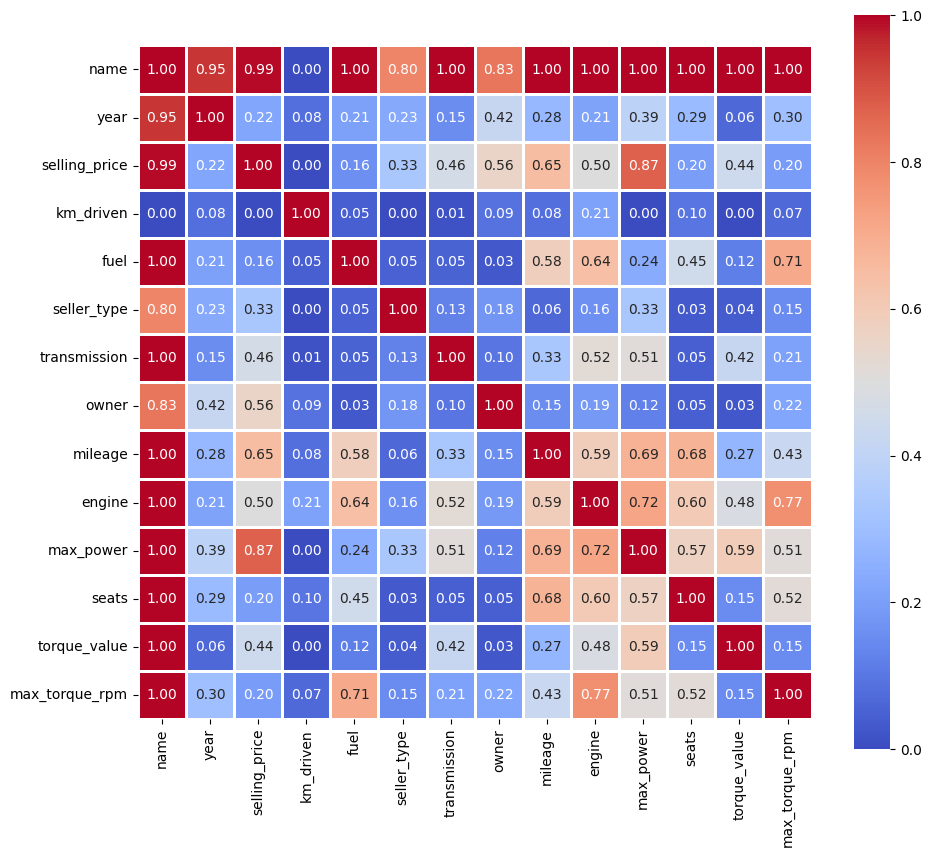

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.phik_matrix(), annot=True, fmt='.2f', cmap='coolwarm', center=0.5, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, vmin=0, vmax=1)
plt.tight_layout()
plt.show()

phik матрица отражает корреляции также между и категориальными признаками

- столбец с name можно игнорировать, он не несет полезной информации, это просто названия
- selling_proce / seller_type - подтверждает мою гипотезу вначале о том, что ценоорбазвание у частников и дилеров может отличаться, какая-то корреляция все-таки есть
- transmission / selling_price - 0.46 авто на аматомате дороже, чем на механике
- transmission / engine (и max_power) - 0.52/0.51 - авто на автомате мощнее, чем на механике
- engine / fuel - 0.64 - интересная зависимость, но требует более подробного рассмотрения


### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [45]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [46]:
df_train_numeric = df_train[numeric_cols].copy()

y_train = df_train_numeric["selling_price"]
X_train = df_train_numeric.drop("selling_price", axis=1)

In [47]:
# assert X_train.shape == (5840, 6) ? вроде все правльно, не понял откуда 6 в ассертах

In [48]:
df_test_numeric = df_test[numeric_cols].copy()

y_test = df_test_numeric["selling_price"]
X_test = df_test_numeric.drop("selling_price", axis=1)

In [49]:
# assert X_test.shape == (1000, 6) ? тут тоже вроде все правильно

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_train_predict = linear_regression_model.predict(X_train)
y_test_predict = linear_regression_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)

train_mse = MSE(y_train, y_train_predict)
test_mse = MSE(y_test, y_test_predict)

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [51]:
def calc_r2(y, y_pred):
    return 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

`Your answer here`

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [52]:
def calc_r2_adj(y, y_pred, features_count):
    r2 = calc_r2(y, y_pred)
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - features_count - 1)

`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [54]:
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train)

y_train_predict_scaled = linear_model_scaled.predict(X_train_scaled)
y_test_predict_scaled = linear_model_scaled.predict(X_test_scaled)
print('Test R2:', r2_score(y_test, y_test_predict_scaled))
print('Test R2:', r2_score(y_test, y_test_predict_scaled))
print('Test adj-R2:', calc_r2_adj(y_test, y_test_predict_scaled, X_test_scaled.shape[1]))

print('Train MSE:', MSE(y_train, y_train_predict_scaled))
print('Train MSE:', MSE(y_train, y_train_predict_scaled))
print('Train adj-R2:', calc_r2_adj(y_train, y_train_predict_scaled, X_train_scaled.shape[1]))

Test R2: 0.5972095317376241
Test R2: 0.5972095317376241
Test adj-R2: 0.5939579436991791
Train MSE: 114813703816.43999
Train MSE: 114813703816.43999
Train adj-R2: 0.5988979482729998


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [55]:
print(*sorted(zip(X_train.columns, linear_model_scaled.coef_), key=lambda x: abs(x[1])), sep='\n')

('mileage', np.float64(-3839.43346385975))
('engine', np.float64(17802.098280117476))
('torque_value', np.float64(23392.46658789394))
('seats', np.float64(-30393.84514368513))
('km_driven', np.float64(-49251.83915404725))
('max_torque_rpm', np.float64(-50667.65720791491))
('year', np.float64(164232.3477677507))
('max_power', np.float64(310102.1825892563))


самый большой по модулю коэффициент у признака max_power

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [56]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

print('Test R2:', r2_score(y_test, y_test_pred_lasso))
print('Test adj-R2:', calc_r2_adj(y_test, y_test_pred_lasso, X_test_scaled.shape[1]))
print('Test MSE:', MSE(y_test, y_test_pred_lasso))

print('Train R2:', r2_score(y_train, y_train_pred_lasso))
print('Train adj-R2:', calc_r2_adj(y_train, y_train_pred_lasso, X_train_scaled.shape[1]))
print('Train MSE:', MSE(y_train, y_train_pred_lasso))

Test R2: 0.5972083169146236
Test adj-R2: 0.593956719069333
Test MSE: 231536161411.14496
Train R2: 0.5994474971935109
Train adj-R2: 0.5988979482272183
Train MSE: 114813703829.54475


In [57]:
print(*sorted(zip(X_train.columns, lasso_model.coef_), key=lambda x: abs(x[1])), sep='\n')

('mileage', np.float64(-3836.3304011928853))
('engine', np.float64(17800.046421388153))
('torque_value', np.float64(23392.32604000858))
('seats', np.float64(-30389.82599317141))
('km_driven', np.float64(-49250.91621619834))
('max_torque_rpm', np.float64(-50665.628481230386))
('year', np.float64(164230.11565848297))
('max_power', np.float64(310103.70264907856))


Качество осталось таким же, зануляние признаков не произошло.

Предполагаю это из-за того, что у нас нет бесполезных признаков, которые никак не влияли бы на стоимось авто, либо влияли в пределах маленькой погрешности.

Методом перебора пришел к тому, что чем больше alpha, то тем хуже качетсво и тем ближе к нулю наименее значимые признаки.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [58]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid={
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
        'max_iter': [1000, 10000, 100000],
        'tol': [1e-4, 1e-3, 1e-2],
        'selection': ['cyclic', 'random']
    },
    cv=10,
    scoring='r2'
)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                   100000, 1000000],
                         'max_iter': [1000, 10000, 100000],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='r2')

In [59]:
grid_search.best_params_

{'alpha': 10000, 'max_iter': 1000, 'selection': 'random', 'tol': 0.01}

In [60]:
best_lasso = grid_search.best_estimator_
y_train_pred_best = best_lasso.predict(X_train_scaled)
y_test_pred_best = best_lasso.predict(X_test_scaled)

In [61]:
print(*sorted(zip(X_train.columns, best_lasso.coef_), key=lambda x: abs(x[1])), sep='\n')

('mileage', np.float64(0.0))
('engine', np.float64(0.0))
('seats', np.float64(-4181.047677613379))
('torque_value', np.float64(28547.89967159766))
('max_torque_rpm', np.float64(-35158.24780730717))
('km_driven', np.float64(-39941.390954871065))
('year', np.float64(154073.9230075023))
('max_power', np.float64(308827.07152978965))


In [62]:
print('Train R2:', r2_score(y_train, y_train_pred_best))
print('Train adj-R2:', calc_r2_adj(y_train, y_train_pred_best, X_train_scaled.shape[1]))
print('Train MSE:', MSE(y_train, y_train_pred_best))
print('Test R2:', r2_score(y_test, y_test_pred_best))
print('Test adj-R2:', calc_r2_adj(y_test, y_test_pred_best, X_test_scaled.shape[1]))
print('Test MSE:', MSE(y_test, y_test_pred_best))

Train R2: 0.5970964124793096
Train adj-R2: 0.5965436378780121
Train MSE: 115487614845.36203
Test R2: 0.5845906560450802
Test adj-R2: 0.581237200190752
Test MSE: 238789153184.32028


всего пришлось обучать 10 * 3 * 3 * 2 * 10 = 1800 моделей

параметры для перебора:

- alpha - коэффициент регуляризации L1
- max_iter - максимальное число итерациц для поиска оптимальных коэффициентов (до критерия сходимости)
- tol - допустимая погрешность
- selection - покоординантый или рандомный спуск

коэффициент регуляризации у лучшей модели: 10000

произнаки, которые занулились: mileage, engine

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [63]:
from sklearn.linear_model import ElasticNet

param_grid_elastic = {
    'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    'l1_ratio': [0.01, 0.05, 0.3, 0.5, 0.9, 0.99],
    'max_iter': [1000, 10000, 10000],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random']
}

grid_search_elastic = GridSearchCV(
    estimator=ElasticNet(random_state=42),
    param_grid=param_grid_elastic,
    cv=10,
    scoring='r2'
)

grid_search_elastic.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000,
                                   1000000],
                         'l1_ratio': [0.01, 0.05, 0.3, 0.5, 0.9, 0.99],
                         'max_iter': [1000, 10000, 10000],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='r2')

очень долго работает код выше, поэтому уменьшил количество перебираемых параметров

In [64]:
print("Лучше параметры:", grid_search.best_params_)

Лучше параметры: {'alpha': 10000, 'max_iter': 1000, 'selection': 'random', 'tol': 0.01}


пришлось обучать 8 * 6 * 2 * 3 * 2 * 10 = 5760 моделей

In [65]:
best_elastic = grid_search_elastic.best_estimator_

y_train_pred_elastic = best_elastic.predict(X_train_scaled)
y_test_pred_elastic = best_elastic.predict(X_test_scaled)

print('Train R2:', r2_score(y_train, y_train_pred_elastic))
print('Train adj-R2:', calc_r2_adj(y_train, y_train_pred_elastic, X_train_scaled.shape[1]))
print('Train MSE:', MSE(y_train, y_train_pred_elastic))
print('Test R2:', r2_score(y_test, y_test_pred_elastic))
print('Test adj-R2:', calc_r2_adj(y_test, y_test_pred_elastic, X_test_scaled.shape[1]))
print('Test MSE:', MSE(y_test, y_test_pred_elastic))

Train R2: 0.5945325286727234
Train adj-R2: 0.5939762364808836
Train MSE: 116222522239.42455
Test R2: 0.5781170573945837
Test adj-R2: 0.5747113424189598
Test MSE: 242510362546.36816


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [66]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [67]:
set(df_train['name'].apply(lambda x: x.split(' ')[0]))

{'Ambassador',
 'Audi',
 'BMW',
 'Chevrolet',
 'Daewoo',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land',
 'Lexus',
 'MG',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Peugeot',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo'}

пока не придумал ничего лучше, чем разбить название авто по разным группам "премиальности" от самых бюджетных до самых дорогих, некоторые марки я не знаю, поэтому попросил claude разибить названия на разные группы.

In [68]:
# claude.ai

print("="*80)
print("🚗 ГРУППИРОВКА БРЕНДОВ ПО ПРЕМИАЛЬНОСТИ")
print("="*80)

# ============================================================================
# Группируем бренды по премиальности (6 уровней)
# ============================================================================

# Группа 1: Массовый бюджетный сегмент (самые доступные)
budget_mass = ['Maruti', 'Tata', 'Datsun', 'Daewoo']

# Группа 2: Массовый средний сегмент
mass_market = ['Hyundai', 'Honda', 'Ford', 'Renault', 'Nissan', 'Chevrolet', 'Fiat']

# Группа 3: Массовый верхний сегмент + внедорожники
mass_premium = ['Toyota', 'Mahindra', 'Skoda', 'Volkswagen', 'Kia', 'MG', 'Jeep']

# Группа 4: Специализированные/утилитарные
specialized = ['Force', 'Isuzu', 'Mitsubishi', 'Peugeot', 'Ambassador']

# Группа 5: Премиум сегмент
premium = ['Land', 'Lexus', 'Volvo']

# Группа 6: Люкс сегмент
luxury = ['Audi', 'BMW', 'Mercedes-Benz', 'Jaguar']

print("\n📊 Распределение брендов по группам:\n")
print(f"1. Бюджетный массовый      ({len(budget_mass):2d}): {budget_mass}")
print(f"2. Средний массовый        ({len(mass_market):2d}): {mass_market}")
print(f"3. Верхний массовый        ({len(mass_premium):2d}): {mass_premium}")
print(f"4. Специализированные      ({len(specialized):2d}): {specialized}")
print(f"5. Премиум                 ({len(premium):2d}): {premium}")
print(f"6. Люкс                    ({len(luxury):2d}): {luxury}")

print(f"\nВсего брендов: {len(budget_mass) + len(mass_market) + len(mass_premium) + len(specialized) + len(premium) + len(luxury)}")

# ============================================================================
# Создаем признаки
# ============================================================================
print("\n" + "="*80)
print("🔧 СОЗДАНИЕ БИНАРНЫХ ПРИЗНАКОВ")
print("="*80)

df_train_processed = df_train.copy()
df_test_processed = df_test.copy()

for df in [df_train_processed, df_test_processed]:
    # Извлекаем бренд (первое слово)
    df['brand'] = df['name'].str.split().str[0]

    # Создаем 6 бинарных признаков для каждой группы
    df['is_budget_mass'] = df['brand'].isin(budget_mass).astype(int)
    df['is_mass_market'] = df['brand'].isin(mass_market).astype(int)
    df['is_mass_premium'] = df['brand'].isin(mass_premium).astype(int)
    df['is_specialized'] = df['brand'].isin(specialized).astype(int)
    df['is_premium'] = df['brand'].isin(premium).astype(int)
    df['is_luxury'] = df['brand'].isin(luxury).astype(int)

    # Удаляем исходные столбцы
    df.drop(['name', 'brand'], axis=1, inplace=True)

print("✅ Создано 6 бинарных признаков из name:")
print("   1. is_budget_mass   - бюджетный массовый сегмент")
print("   2. is_mass_market   - средний массовый сегмент")
print("   3. is_mass_premium  - верхний массовый сегмент")
print("   4. is_specialized   - специализированные бренды")
print("   5. is_premium       - премиум сегмент")
print("   6. is_luxury        - люкс сегмент")

# ============================================================================
# Собираем все категориальные столбцы
# ============================================================================
print("\n" + "="*80)
print("📋 ФОРМИРУЕМ X_train_cat")
print("="*80)

# Категориальные столбцы типа object
categorical_cols = df_train_processed.select_dtypes(include=['object']).columns.tolist()
print(f"\nObject столбцы: {categorical_cols}")

# Добавляем числовые категориальные
numeric_categorical = [
    'seats',
    'is_budget_mass',
    'is_mass_market',
    'is_mass_premium',
    'is_specialized',
    'is_premium',
    'is_luxury'
]

for col in numeric_categorical:
    if col in df_train_processed.columns and col not in categorical_cols:
        categorical_cols.append(col)

print(f"Числовые категориальные: {numeric_categorical}")

print(f"\n✅ ВСЕГО категориальных столбцов: {len(categorical_cols)}")
for i, col in enumerate(categorical_cols, 1):
    print(f"   {i:2d}. {col}")

# Создаем X_train_cat и X_test_cat
X_train_cat = df_train_processed[categorical_cols].copy()
X_test_cat = df_test_processed[categorical_cols].copy()

print(f"\n📊 Результат:")
print(f"   X_train_cat.shape: {X_train_cat.shape}")
print(f"   X_test_cat.shape:  {X_test_cat.shape}")

# ============================================================================
# Проверка assertion
# ============================================================================
print("\n" + "="*80)
print("🎯 ПРОВЕРКА")
print("="*80)

try:
    assert X_train_cat.shape == (5840, 11), f"Ожидалось (5840, 11), получено {X_train_cat.shape}"
    print("✅ УСПЕХ! Assertion passed!")
    print("✅ X_train_cat.shape == (5840, 11)")
except AssertionError as e:
    print(f"❌ Assertion failed: {e}")
    print(f"\nТекущие столбцы ({len(categorical_cols)}):")
    for i, col in enumerate(categorical_cols, 1):
        print(f"   {i:2d}. {col}")

print("="*80)

🚗 ГРУППИРОВКА БРЕНДОВ ПО ПРЕМИАЛЬНОСТИ

📊 Распределение брендов по группам:

1. Бюджетный массовый      ( 4): ['Maruti', 'Tata', 'Datsun', 'Daewoo']
2. Средний массовый        ( 7): ['Hyundai', 'Honda', 'Ford', 'Renault', 'Nissan', 'Chevrolet', 'Fiat']
3. Верхний массовый        ( 7): ['Toyota', 'Mahindra', 'Skoda', 'Volkswagen', 'Kia', 'MG', 'Jeep']
4. Специализированные      ( 5): ['Force', 'Isuzu', 'Mitsubishi', 'Peugeot', 'Ambassador']
5. Премиум                 ( 3): ['Land', 'Lexus', 'Volvo']
6. Люкс                    ( 4): ['Audi', 'BMW', 'Mercedes-Benz', 'Jaguar']

Всего брендов: 30

🔧 СОЗДАНИЕ БИНАРНЫХ ПРИЗНАКОВ
✅ Создано 6 бинарных признаков из name:
   1. is_budget_mass   - бюджетный массовый сегмент
   2. is_mass_market   - средний массовый сегмент
   3. is_mass_premium  - верхний массовый сегмент
   4. is_specialized   - специализированные бренды
   5. is_premium       - премиум сегмент
   6. is_luxury        - люкс сегмент

📋 ФОРМИРУЕМ X_train_cat

Object столбцы: ['fuel

In [69]:
assert X_train_cat.shape == (5840, 11)

In [70]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [71]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

ohe.fit(X_train_cat)

X_train_encoded = ohe.transform(X_train_cat)
X_test_encoded = ohe.transform(X_test_cat)

feature_names = ohe.get_feature_names_out(X_train_cat.columns)

X_train_ohe = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train_cat.index)
X_test_ohe = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test_cat.index)

print(f"X_train_ohe.shape: {X_train_ohe.shape}")
print(f"X_test_ohe.shape: {X_test_ohe.shape}")

X_train_ohe.shape: (5840, 24)
X_test_ohe.shape: (1000, 24)


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

- нужно трансформировать и трейн и тест
- убираем мултиколлинеарность (дамми ловушка: получим лин зависимые столбцы, следовательно коэффициенты модели могут быть неопределенными)
- удалять можно но осторожно, мы могли разбить выборку так, что чисто лучайно эти признаки оказались неважными, нужно обучать с кросс-валидацией

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [72]:
from sklearn.linear_model import Ridge

X_train_full = pd.concat([
    pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index),
    X_train_ohe
], axis=1)

X_test_full = pd.concat([
    pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index),
    X_test_ohe
], axis=1)

param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

grid_search_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid_ridge,
    cv=10,
    scoring='r2'
)

grid_search_ridge.fit(X_train_full, y_train)

best_ridge = grid_search_ridge.best_estimator_
y_train_pred_ridge = best_ridge.predict(X_train_full)
y_test_pred_ridge = best_ridge.predict(X_test_full)

In [73]:
print('Train R2:', r2_score(y_train, y_train_pred_ridge))
print('Train adj-R2:', calc_r2_adj(y_train, y_train_pred_ridge, X_train_full.shape[1]))
print('Train MSE:', MSE(y_train, y_train_pred_ridge))
print('Test R2:', r2_score(y_test, y_test_pred_ridge))
print('Test adj-R2:', calc_r2_adj(y_test, y_test_pred_ridge, X_test_full.shape[1]))
print('Test MSE:', MSE(y_test, y_test_pred_ridge))

Train R2: 0.7455331277085742
Train adj-R2: 0.7441308649372076
Train MSE: 72939961440.74281
Test R2: 0.7597312474181112
Test adj-R2: 0.751780264912816
Test MSE: 138113340011.69794


Качество выросло! adj-R2 был 0.59, стал 0.76, заметное улучшение

Учет категориальных признаков (как и ожидалось) увеличил качество модели

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [74]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [75]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_pred - y_true) / y_true) < 0.1)

In [76]:
# claude ai

models_results = {
    'Linear Regression Scaled': (y_test_predict_scaled, y_train_predict_scaled),
    'Lasso with GridSearch': (y_test_pred_best, y_train_pred_best),
    'ElasticNet with GridSearch': (y_test_pred_elastic, y_train_pred_elastic),
    'Ridge with GridSearch': (y_test_pred_ridge, y_train_pred_ridge)
}

results_business = []

for model_name, (test_pred, train_pred) in models_results.items():
    train_bm = business_metric(y_train, train_pred)
    test_bm = business_metric(y_test, test_pred)

    results_business.append({
        'Model': model_name,
        'Train BM (%)': train_bm * 100,
        'Test BM (%)': test_bm * 100,
        'Test R²': r2_score(y_test, test_pred)
    })

results_df = pd.DataFrame(results_business)
results_df = results_df.sort_values('Test BM (%)', ascending=False)

print(results_df.to_string(index=False))

best_model_idx = results_df['Test BM (%)'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_bm = results_df.loc[best_model_idx, 'Test BM (%)']

print()
print("Best Model:", best_model_name)

                     Model  Train BM (%)  Test BM (%)  Test R²
     Ridge with GridSearch     23.510274         27.7 0.759731
     Lasso with GridSearch     22.654110         24.5 0.584591
ElasticNet with GridSearch     22.756849         24.3 0.578117
  Linear Regression Scaled     21.866438         24.0 0.597210

Best Model: Ridge with GridSearch


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [77]:
def your_business_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    errors = y_pred - y_true

    under = errors < 0
    over = errors >= 0

    weighted_errors = np.zeros_like(errors, dtype=float)
    weighted_errors[under] = np.abs(errors[under]) * 0.5 # 0.5 - penalty coeff
    weighted_errors[over] = np.abs(errors[over])

    return 1 / (1 + np.mean(weighted_errors / y_true))


In [78]:
models_results = {
    'Linear Regression Scaled': (y_test_predict_scaled, y_train_predict_scaled),
    'Lasso with GridSearch': (y_test_pred_best, y_train_pred_best),
    'ElasticNet with GridSearch': (y_test_pred_elastic, y_train_pred_elastic),
    'Ridge with GridSearch': (y_test_pred_ridge, y_train_pred_ridge)
}

results_asymmetric = []

# claide.ai для красивого вывода
for model_name, (test_pred, train_pred) in models_results.items():
    train_am = your_business_metrics(y_train, train_pred)
    test_am = your_business_metrics(y_test, test_pred)

    underpredict_count = np.sum(test_pred < y_test)
    overpredict_count = np.sum(test_pred >= y_test)

    results_asymmetric.append({
        'Model': model_name,
        'Train AM': train_am,
        'Test AM': test_am,
        'Test R²': r2_score(y_test, test_pred),
        'Underpredict': underpredict_count,
        'Overpredict': overpredict_count
    })

results_am_df = pd.DataFrame(results_asymmetric)
results_am_df = results_am_df.sort_values('Test AM', ascending=False)

print("\nРезультаты (отсортировано по Test AM, чем больше - тем лучше):")
print(results_am_df.to_string(index=False))

best_model_idx = results_am_df['Test AM'].idxmax()
best_model_name = results_am_df.loc[best_model_idx, 'Model']
best_am = results_am_df.loc[best_model_idx, 'Test AM']

print()
print("Best Model:", best_model_name)
print(f"Best Asymmetric Metric: {best_am:.4f}")


Результаты (отсортировано по Test AM, чем больше - тем лучше):
                     Model  Train AM  Test AM  Test R²  Underpredict  Overpredict
     Ridge with GridSearch  0.743611 0.737140 0.759731           499          501
ElasticNet with GridSearch  0.703470 0.717563 0.578117           485          515
     Lasso with GridSearch  0.700065 0.711336 0.584591           472          528
  Linear Regression Scaled  0.692883 0.705869 0.597210           474          526

Best Model: Ridge with GridSearch
Best Asymmetric Metric: 0.7371


# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 25**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)